
# Árvore binária de busca

- Pacote BinaryTree: https://binarytree.readthedocs.io/en/main/
- https://www.geeksforgeeks.org/binarytree-module-in-python/
- https://pypi.org/project/binarytree/

In [1]:
!pip install binarytree

In [2]:
%%file ABB.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

typedef struct lista {
  Arv* node;
  struct lista *prox;
} Lista;

typedef struct fila {
  Lista* ini;
  Lista* fim;
} Fila;

Arv* removeFila(Fila* pFila){
  if(pFila == NULL)
    return NULL;
  
  Lista* aux = pFila->ini;
  Arv* node;
  if(aux!=NULL){
    pFila->ini = pFila->ini->prox;
    node = aux->node;
    free(aux);    
  }
  //Veirifa se ficou vazio
  if(pFila->ini == NULL)
    pFila->fim = NULL;
  return node;
}

void insereFila(Fila* pFila, Arv* info){
  Lista* novo = (Lista*) malloc(sizeof(Lista));
  novo->node = info;
  novo->prox = NULL;
  if(pFila->ini==NULL){
    pFila->ini = novo;
    pFila->fim = novo;
  }else{
    pFila->fim->prox = novo;
    pFila->fim = novo;
  }  
}

Arv *insereArv(Arv *raiz, int info) {
  // Caso base
  if (raiz == NULL) {
    Arv *novo = (Arv *)malloc(sizeof(Arv));
    novo->valor = info;
    novo->esq = NULL;
    novo->dir = NULL;
    return novo;
  } else {
    if (raiz->valor > info) {
      raiz->esq = insereArv(raiz->esq, info);
    } else {
      raiz->dir = insereArv(raiz->dir, info);
    }
    return raiz;
  }
}

int altura(Arv *raiz)
{
  // Arvore nula
  if (raiz == NULL)
  {
    return -1;
  }

  int dir = altura(raiz->dir);
  int esq = altura(raiz->esq);

  if (esq > dir)
  {
    return esq + 1;
  }
  else
  {
    return dir + 1;
  }
}

# //Busca em Largura
void BFS(Arv* raiz, FILE* f){
    Arv* node = NULL;
    Fila* F = (Fila*) malloc(sizeof(Fila));
    F->ini = NULL;
    F->fim = NULL; 
    fprintf(f,"%d\n", altura(raiz));
    insereFila(F, raiz);

    while (F->ini != NULL) {
        node = removeFila(F);
        if(node != NULL){
          printf("%d, ", node->valor);
          fprintf(f, "%d\n",node->valor);   
           if (node->esq!=NULL){
              insereFila(F, node->esq);
           }else{
               insereFila(F, NULL);
           }
           if (node->dir!=NULL){
              insereFila(F, node->dir);      
           }else{
              insereFila(F, NULL);
           }  
        }else{
          printf("%s, ", "None");
          fprintf(f, "%d\n",0); 
        }       
    }      
}


int main() {
  FILE *fptr;
  fptr = fopen("bTree.txt", "w");
  
  if (fptr != NULL) {
    printf("Arquivo criado com sucesso!\n");
  }
  else {
    printf("Failed to create the file.\n");
    // exit status for OS that an error occurred
    return -1;
  }  
    
  Arv *raiz = NULL;
  raiz = insereArv(raiz, 10);
  raiz = insereArv(raiz, 8);
  raiz = insereArv(raiz, 30);
  raiz = insereArv(raiz, 35);
  raiz = insereArv(raiz, 2);
  raiz = insereArv(raiz, 9);
  raiz = insereArv(raiz, 15);
  raiz = insereArv(raiz, 33);
  raiz = insereArv(raiz, 22);
  BFS(raiz,fptr);
  fclose(fptr);
  return 0;
}


Overwriting ABB.c


In [3]:
!gcc ABB.c -o abb
!abb

Arquivo criado com sucesso!
10, 8, 30, 2, 9, 15, 35, None, None, None, None, None, 22, 33, None, None, None, None, None, 


In [4]:
!type bTree.txt

3
10
8
30
2
9
15
35
0
0
0
0
0
22
33
0
0
0
0
0


In [5]:
## Faz a leitura da arvore gerada em C
# opening the file in read mode

# reading the file
lines = []
with open("bTree.txt", 'r') as f:
     while True:
        line = f.readline().strip()        
        if not line:
            break
        
        lines.append(int(line))

# printing the data
bTree = []
for i in lines:
  if i == 0:
    bTree.append(None)
  else:
    bTree.append(i)  
print(bTree)
f.close()

[3, 10, 8, 30, 2, 9, 15, 35, None, None, None, None, None, 22, 33, None, None, None, None, None]


In [6]:
# Gerando uma árvore binária
# a partir de uma lista
from binarytree import build

# Lista de nós
#nodes =[3, 6, 8, 2, 11, 13, 14, 17, 20, 
#        30, 50, 7, 9]

# Gera o objeto árvore binária
binary_tree = build(bTree)
print('Àrvore Binária :\n', binary_tree)

# Imprime os valores dos nós
print('\nLista :', binary_tree.values)


Àrvore Binária :
 
        ___3__
       /      \
     _10       8___
    /   \     /    \
  _30    2   9     _15
 /                /   \
35               22    33


Lista : [3, 10, 8, 30, 2, 9, 15, 35, None, None, None, None, None, 22, 33]


#### Percurso

In [7]:
print(binary_tree.inorder)

print(binary_tree.preorder)

print(binary_tree.postorder) 

[Node(35), Node(30), Node(10), Node(2), Node(3), Node(9), Node(8), Node(22), Node(15), Node(33)]
[Node(3), Node(10), Node(30), Node(35), Node(2), Node(8), Node(9), Node(15), Node(22), Node(33)]
[Node(35), Node(30), Node(2), Node(10), Node(9), Node(22), Node(33), Node(15), Node(8), Node(3)]


#### Avaliando as propriedades das árvores

In [8]:
# Imprime a lista de nós
print('List of nodes :', list(binary_tree))
  

# Propriedades
print('Tamanho :', binary_tree.size)
print('Altura :', binary_tree.height)
print('Qtde Folhas :', binary_tree.leaf_count)
#print('Folhas :', root.leaves)
print('Binária de Busca :', binary_tree.is_bst)

List of nodes : [Node(3), Node(10), Node(8), Node(30), Node(2), Node(9), Node(15), Node(35), Node(22), Node(33)]
Tamanho : 10
Altura : 3
Qtde Folhas : 5
Binária de Busca : False


#### Visualização com graphviz()

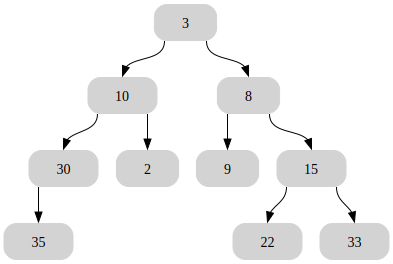

In [9]:
binary_tree.graphviz()

# Atividade valendo nota:

* Construir a função que calcula altura no arquivo ABB.c
* Incluir na primeira linha do arquivo bTree.txt o valor da altura
* Construir a ABB e python com o metodo build
* Avaliar com o metodo height (binarytree library) se a altura é igual

In [ ]:
!pip install binarytree

In [23]:
%%file ABB.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

typedef struct lista {
  Arv* node;
  struct lista *prox;
} Lista;

typedef struct fila {
  Lista* ini;
  Lista* fim;
} Fila;

Arv* removeFila(Fila* pFila){
  if(pFila == NULL)
    return NULL;
  
  Lista* aux = pFila->ini;
  Arv* node;
  if(aux!=NULL){
    pFila->ini = pFila->ini->prox;
    node = aux->node;
    free(aux);    
  }
  //Veirifa se ficou vazio
  if(pFila->ini == NULL)
    pFila->fim = NULL;
  return node;
}

void insereFila(Fila* pFila, Arv* info){
  Lista* novo = (Lista*) malloc(sizeof(Lista));
  novo->node = info;
  novo->prox = NULL;
  if(pFila->ini==NULL){
    pFila->ini = novo;
    pFila->fim = novo;
  }else{
    pFila->fim->prox = novo;
    pFila->fim = novo;
  }  
}

Arv *insereArv(Arv *raiz, int info) {
  // Caso base
  if (raiz == NULL) {
    Arv *novo = (Arv *)malloc(sizeof(Arv));
    novo->valor = info;
    novo->esq = NULL;
    novo->dir = NULL;
    return novo;
  } else {
    if (raiz->valor > info) {
      raiz->esq = insereArv(raiz->esq, info);
    } else {
      raiz->dir = insereArv(raiz->dir, info);
    }
    return raiz;
  }
}

int altura(Arv* raiz){
    int esq = 0;
    int dir = 0;

    //Caso árvore vazia
    if(raiz == NULL){
        return -1;
    } else {
        //Análise de cada lado da árvore
        esq += altura(raiz->esq);
        dir += altura(raiz->dir);
        if(esq >= dir){
            return ++esq;
        } else {
            return ++dir;
        }
    }
}

void BFS(Arv* raiz, FILE* f){
    Arv* node = NULL;
    Fila* F = (Fila*) malloc(sizeof(Fila));
    F->ini = NULL;
    F->fim = NULL; 
    fprintf(f, "%d\n", altura(raiz));
    insereFila(F, raiz);

    while (F->ini != NULL) {
        node = removeFila(F);
        if(node != NULL){
          printf("%d, ", node->valor);
          fprintf(f, "%d\n",node->valor);   
           if (node->esq!=NULL){
              insereFila(F, node->esq);
           }else{
               insereFila(F, NULL);
           }
           if (node->dir!=NULL){
              insereFila(F, node->dir);      
           }else{
              insereFila(F, NULL);
           }  
        }else{
          printf("%s, ", "None");
          fprintf(f, "%d\n",0); 
        }       
    }      
}

int main() {
  FILE *fptr;
  fptr = fopen("bTree.txt", "w");
  
  if (fptr != NULL) {
    printf("Arquivo criado com sucesso!\n");
  }
  else {
    printf("Failed to create the file.\n");
    // exit status for OS that an error occurred
    return -1;
  }  
    
  Arv *raiz = NULL;
  raiz = insereArv(raiz, 10);
  raiz = insereArv(raiz, 8);
  raiz = insereArv(raiz, 30);
  raiz = insereArv(raiz, 35);
  raiz = insereArv(raiz, 2);
  raiz = insereArv(raiz, 9);
  raiz = insereArv(raiz, 15);
  raiz = insereArv(raiz, 33);
  raiz = insereArv(raiz, 22);
  BFS(raiz,fptr);
  fclose(fptr);
  return 0;
}

int quantidade_folhas(NoArv *raiz){
    if(raiz == NULL)
        return 0;
    else if(raiz->esquerda == NULL && raiz->direita == NULL)
        return 1;
    else
        return quantidade_folhas(raiz->esquerda) + quantidade_folhas(raiz->direita);
}

Overwriting ABB.c


In [24]:
!gcc ABB.c -o abb
!abb

Arquivo criado com sucesso!
10, 8, 30, 2, 9, 15, 35, None, None, None, None, None, 22, 33, None, None, None, None, None, 


In [25]:
!type bTree.txt

3
10
8
30
2
9
15
35
0
0
0
0
0
22
33
0
0
0
0
0


In [26]:
## Faz a leitura da arvore gerada em C
# opening the file in read mode

# reading the file
lines = []
with open("bTree.txt", 'r') as f:
     while True:
        line = f.readline().strip()        
        if not line:
            break
        
        lines.append(int(line))

# printing the data
altura = lines[0]
del lines[0]
bTree = []
for i in lines:
  if i == 0:
    bTree.append(None)
  else:
    bTree.append(i)  
print(bTree)
f.close()

[10, 8, 30, 2, 9, 15, 35, None, None, None, None, None, 22, 33, None, None, None, None, None]


In [27]:
# Gerando uma árvore binária
# a partir de uma lista
from binarytree import build

# Lista de nós
#nodes =[3, 6, 8, 2, 11, 13, 14, 17, 20, 
#        30, 50, 7, 9]

# Gera o objeto árvore binária
binary_tree = build(bTree)
print('Àrvore Binária :\n', binary_tree)

# Imprime os valores dos nós
print('\nLista :', binary_tree.values)


Àrvore Binária :
 
    __10______
   /          \
  8        ____30___
 / \      /         \
2   9    15         _35
           \       /
            22    33


Lista : [10, 8, 30, 2, 9, 15, 35, None, None, None, None, None, 22, 33]


In [28]:
# Imprime a lista de nós
print('List of nodes :', list(binary_tree))
  

# Propriedades
print('Tamanho :', binary_tree.size)
print('Altura da função em c:', altura)
print('Altura :', binary_tree.height)

if altura == binary_tree.height:
    print('Resultados iguais - Função válida')
else:
    print('Função em c tá quebrada')

print('Qtde Folhas :', binary_tree.leaf_count)
print('Binária de Busca :', binary_tree.is_bst)

List of nodes : [Node(10), Node(8), Node(30), Node(2), Node(9), Node(15), Node(35), Node(22), Node(33)]
Tamanho : 9
Altura da função em c: 3
Altura : 3
Resultados iguais - Função válida
Qtde Folhas : 4
Binária de Busca : True
